In [67]:
library(tidyverse)
library(tidymodels)
library(repr)
set.seed(560)

In [2]:
stroke <- read_csv("https://raw.githubusercontent.com/Megunight/dsci100-project/main/stroke_prediction_dataset.csv")

Rows: 15000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Patient Name, Gender, Marital Status, Work Type, Residence Type, S...
dbl  (8): Patient ID, Age, Hypertension, Heart Disease, Average Glucose Leve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
names(stroke) <- c("patient_id", "patient_name", "age", "gender", "hypertension", "heart_disease", "marital_status",
                  "work_type", "residence_type", "average_glucose_level", "bmi", "smoking_status", "alcohol_intake", "physical_activity",
                  "stroke_history", "family_history_of_stroke", "dietary_habits", "stress_levels", "blood_pressure_levels",
                  "cholesterol_levels", "symptoms", "diagnosis")
head(stroke)

patient_id patient_name      age gender hypertension heart_disease
1 18153      Mamooty Khurana   56  Male   0            1            
2 62749      Kaira Subramaniam 80  Male   0            0            
3 32145      Dhanush Balan     26  Male   1            1            
4  6154      Ivana Baral       73  Male   0            0            
5 48973      Darshit Jayaraman 51  Male   1            1            
6 29307      Advika Kota       62  Female 0            0            
  marital_status work_type     residence_type average_glucose_level ⋯
1 Married        Self-employed Rural          130.91                ⋯
2 Single         Self-employed Urban          183.73                ⋯
3 Married        Never Worked  Rural          189.00                ⋯
4 Married        Never Worked  Urban          185.29                ⋯
5 Divorced       Self-employed Urban          177.34                ⋯
6 Single         Private       Urban           91.60                ⋯
  alcohol_intake   physical_activity stroke_history family_history_of_stroke
1 Social Drinker   Moderate          0              Yes                     
2 Never            Low               0              No                      
3 Rarely           High              0              Yes                     
4 Frequent Drinker Moderate          0              No                      
5 Rarely           Low               0              Yes                     
6 Social Drinker   High              0              No                      
  dietary_habits stress_levels blood_pressure_levels cholesterol_levels
1 Vegan          3.48          140/108               HDL: 68, LDL: 133 
2 Paleo          1.73          146/91                HDL: 63, LDL: 70  
3 Paleo          7.31          154/97                HDL: 59, LDL: 95  
4 Paleo          5.35          174/81                HDL: 70, LDL: 137 
5 Pescatarian    6.84          121/95                HDL: 65, LDL: 68  
6 Gluten-Free    4.85          132/64                HDL: 80, LDL: 69  
  symptoms                                                      diagnosis
1 Difficulty Speaking, Headache                                 Stroke   
2 Loss of Balance, Headache, Dizziness, Confusion               Stroke   
3 Seizures, Dizziness                                           Stroke   
4 Seizures, Blurred Vision, Severe Fatigue, Headache, Confusion No Stroke
5 Difficulty Speaking                                           Stroke   
6 Severe Fatigue                                                Stroke

In [4]:
#Seven different variables have been selected for use

stroke_selected <- stroke |>
                    select(age,
                           hypertension,
                           stress_levels,
                           diagnosis)

In [5]:
stroke_sample <- stroke_selected |>
                sample_n(5000)

In [6]:
stroke_split <- initial_split(stroke_sample, prop = 0.75, strata = diagnosis)
stroke_training <- training(stroke_split)
stroke_testing <- testing(stroke_split)

In [7]:
stroke_training <- stroke_training |>
  mutate(stress_level_category = case_when(
    stress_levels <= 2.5 ~ "Low",
    stress_levels > 2.5 & stress_levels <= 5.0 ~ "Moderate",
    stress_levels > 5.0 & stress_levels <= 7.5 ~ "High",
    stress_levels > 7.5 ~ "Very High") )


stroke_training <- stroke_training |>
    mutate(age_group = cut(age, breaks = seq(0, 100, by = 10), labels = seq(0, 90, by = 10), right = FALSE)) |>
    mutate(hypertension = as_factor(hypertension)) |>
    mutate(hypertension = fct_recode(hypertension, "False" = "0", "True" = "1"))

stroke_testing <- stroke_testing |>
  mutate(stress_level_category = case_when(
    stress_levels <= 2.5 ~ "Low",
    stress_levels > 2.5 & stress_levels <= 5.0 ~ "Moderate",
    stress_levels > 5.0 & stress_levels <= 7.5 ~ "High",
    stress_levels > 7.5 ~ "Very High") )


stroke_testing <- stroke_testing |>
    mutate(age_group = cut(age, breaks = seq(0, 100, by = 10), labels = seq(0, 90, by = 10), right = FALSE)) |>
    mutate(hypertension = as_factor(hypertension)) |>
    mutate(hypertension = fct_recode(hypertension, "False" = "0", "True" = "1"))


In [8]:
stroke_training <- stroke_training |>
    mutate(diagnosis_group = fct_recode(diagnosis, "0" = "No Stroke", "1" = "Stroke"))

stroke_testing <- stroke_testing |>
    mutate(diagnosis_group = fct_recode(diagnosis, "0" = "No Stroke", "1" = "Stroke"))

In [9]:
stroke_obs <- stroke_training |>
                group_by(diagnosis_group) |>
                summarise(count = n())
stroke_obs


diagnosis_group count
1 0               1866 
2 1               1884

Warning message in geom_histogram(stat = "count", position = "dodge"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count", position = "dodge"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


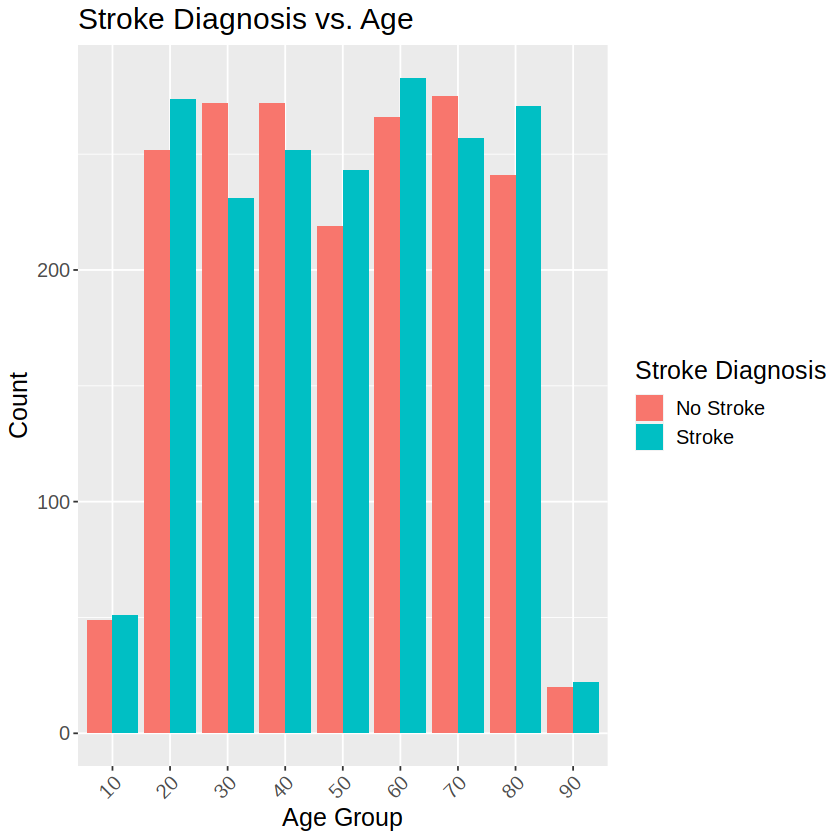

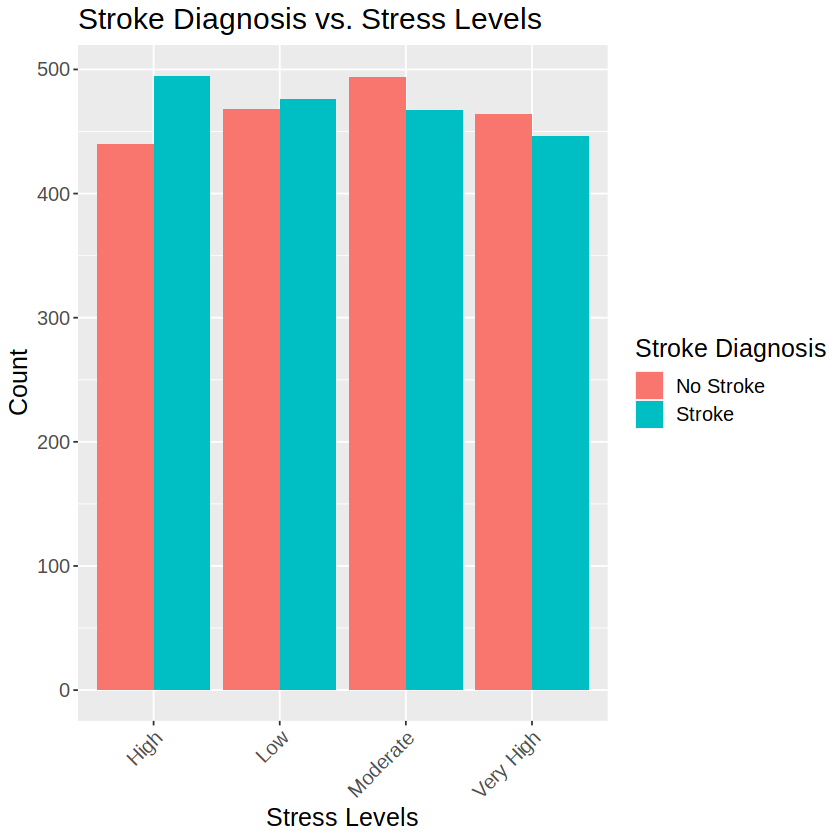

In [10]:
set.seed(560)
options(repr.plot.width = 7, repr.plot.height = 7)

stroke_age <- stroke_training |>
            ggplot(aes(x = age_group, fill = diagnosis)) +
            geom_histogram(stat = "count", position = "dodge") +
            labs(x = "Age Group", y = "Count", fill = "Stroke Diagnosis") +
            ggtitle("Stroke Diagnosis vs. Age") +
            theme(text = element_text(size = 15))  +
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
stroke_age

stroke_stress <- stroke_training |>
            ggplot(aes(x = stress_level_category, fill = diagnosis)) +
            geom_histogram(stat = "count", position = "dodge") +
            labs(x = "Stress Levels", y = "Count", fill = "Stroke Diagnosis") +
            ggtitle("Stroke Diagnosis vs. Stress Levels") +
            theme(text = element_text(size = 15))  +
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
stroke_stress


In [11]:
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [12]:
stroke_recipe <- recipe(diagnosis_group ~ age + stress_levels, data = stroke_training)

In [13]:
stroke_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                    set_engine("kknn") |>
                    set_mode("classification")

In [19]:
set.seed(560)
stroke_vfold <- vfold_cv(stroke_training, v = 5, strata = diagnosis_group) 

grid_values <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

stroke_workflow <- workflow() |>
                    add_recipe(stroke_recipe) |>
                    add_model(stroke_spec) |>
                    tune_grid(resamples = stroke_vfold, grid = grid_values) |>
                    collect_metrics()


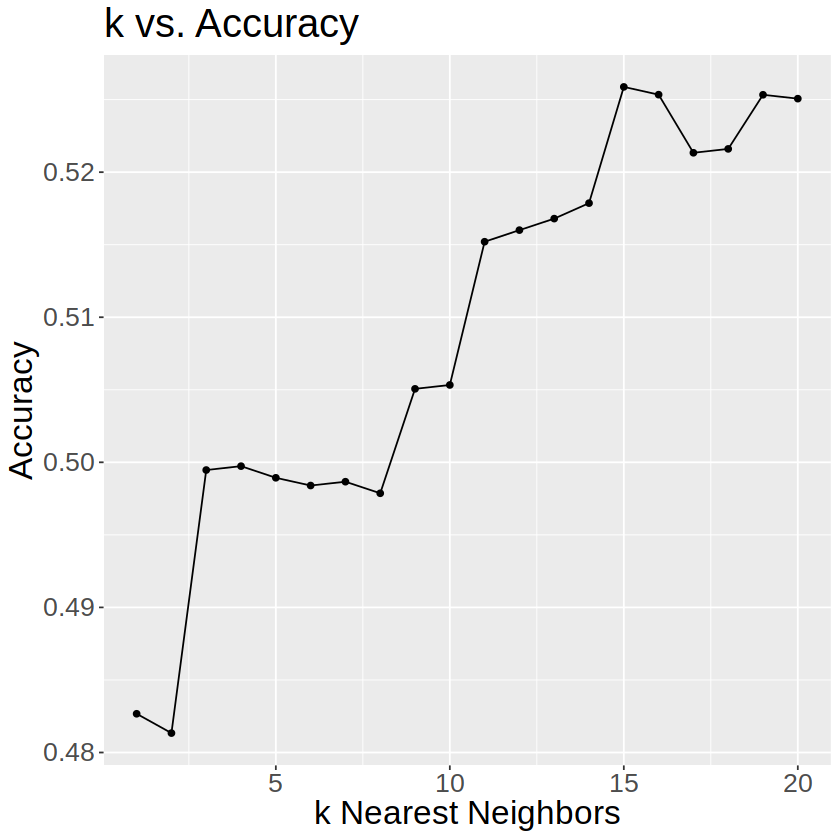

In [20]:
set.seed(560)
stroke_accuracies <- stroke_workflow |>
                        filter(.metric == "accuracy") 
                        
cross_val_plot <- ggplot(stroke_accuracies, aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() +
                  labs(title = "k vs. Accuracy",
                       x = "k Nearest Neighbors",
                       y = "Accuracy") +
                  theme(text = element_text(size = 20))
cross_val_plot

In [21]:
stroke_spec_matrix <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) |>
            set_engine("kknn") |>
            set_mode("classification")

stroke_fit <- workflow() |>
            add_recipe(stroke_recipe) |>
            add_model(stroke_spec_matrix) |>
            fit(data = stroke_training)


In [40]:
stroke_predictions <- predict(stroke_fit, stroke_testing) |>
                        bind_cols(stroke_testing)

In [42]:
stroke_predictions <- stroke_predictions |>
            mutate(.pred_class = fct_recode(.pred_class, "0" = "No Stroke", "1" = "Stroke"))

stroke_metrics <- stroke_predictions |>
                        metrics(truth = diagnosis_group, estimate = .pred_class) |>
                        filter(.metric == "accuracy")

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `.pred_class = fct_recode(.pred_class, `0` = "No Stroke", `1` =
  "Stroke")`.
Caused by warning:
! Unknown levels in `f`: No Stroke, Stroke”


In [43]:
stroke_conf_mat <- stroke_predictions |>
                conf_mat(truth = diagnosis_group, estimate = .pred_class)
stroke_conf_mat

          Truth
Prediction   0   1
         0 309 287
         1 313 341

In [46]:
stroke_predictions

.pred_class age hypertension stress_levels diagnosis stress_level_category
1    0           75  False        7.93          Stroke    Very High            
2    0           29  False        3.57          Stroke    Moderate             
3    1           33  False        5.25          No Stroke High                 
4    0           74  False        7.82          No Stroke Very High            
5    1           52  False        9.43          Stroke    Very High            
6    0           33  True         6.00          No Stroke High                 
7    1           55  False        0.67          Stroke    Low                  
8    0           37  False        2.08          Stroke    Low                  
9    0           43  True         8.88          No Stroke Very High            
10   0           50  False        2.54          Stroke    Moderate             
11   0           76  False        8.13          No Stroke Very High            
12   0           58  True         4.50          No Stroke Moderate             
13   1           54  True         9.82          Stroke    Very High            
14   1           18  False        8.26          No Stroke Very High            
15   1           52  True         2.35          Stroke    Low                  
16   0           32  False        9.01          Stroke    Very High            
17   1           61  False        4.99          Stroke    Moderate             
18   1           60  True         2.33          Stroke    Low                  
19   0           90  False        0.07          Stroke    Low                  
20   1           79  False        6.84          No Stroke High                 
21   1           19  False        2.51          No Stroke Moderate             
22   1           77  False        6.05          Stroke    High                 
23   0           37  False        2.01          No Stroke Low                  
24   1           79  False        5.59          Stroke    High                 
25   1           51  False        1.76          Stroke    Low                  
26   1           39  False        8.99          No Stroke Very High            
27   1           71  False        5.17          No Stroke High                 
28   0           34  False        5.88          Stroke    High                 
29   0           74  False        2.09          No Stroke Low                  
30   0           22  True         0.12          Stroke    Low                  
⋮    ⋮           ⋮   ⋮            ⋮             ⋮         ⋮                    
1221 1           88  False        3.04          No Stroke Moderate             
1222 1           77  False        7.17          Stroke    High                 
1223 1           69  False        8.30          Stroke    Very High            
1224 1           80  True         1.15          No Stroke Low                  
1225 1           26  False        2.34          Stroke    Low                  
1226 1           79  False        7.79          No Stroke Very High            
1227 0           82  True         8.93          Stroke    Very High            
1228 0           18  False        5.43          No Stroke High                 
1229 1           28  False        9.17          No Stroke Very High            
1230 0           48  True         2.36          Stroke    Low                  
1231 0           35  False        8.72          No Stroke Very High            
1232 0           45  False        4.09          Stroke    Moderate             
1233 1           48  False        2.44          Stroke    Low                  
1234 1           18  False        2.44          Stroke    Low                  
1235 1           78  False        1.62          No Stroke Low                  
1236 1           85  False        7.92          Stroke    Very High            
1237 0           55  False        7.39          No Stroke High                 
1238 1           50  False        9.66          No Stroke Very High            
1239 

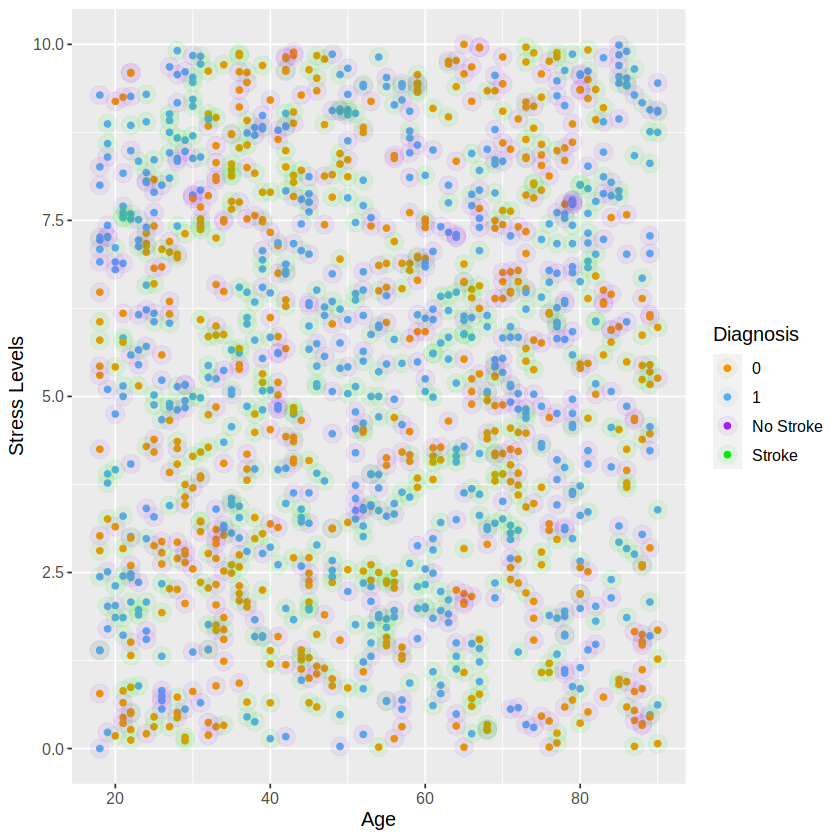

In [115]:
set.seed(560)
stroke_results_plot <-
  ggplot() +
  geom_point(data = stroke_predictions, 
             mapping = aes(x = age, 
                           y = stress_levels, 
                           color = .pred_class), 
             alpha = 5) +
  geom_point(data = stroke_testing, 
             mapping = aes(x = age, 
                           y = stress_levels, 
                           color = diagnosis), 
             alpha = 0.07, 
             size = 5) +
  labs(color = "Diagnosis", 
       x = "Age", 
       y = "Stress Levels") +
    scale_color_manual(values = c("orange2", "steelblue2", "purple", "green2")) +
  theme(text = element_text(size = 12))
stroke_results_plot

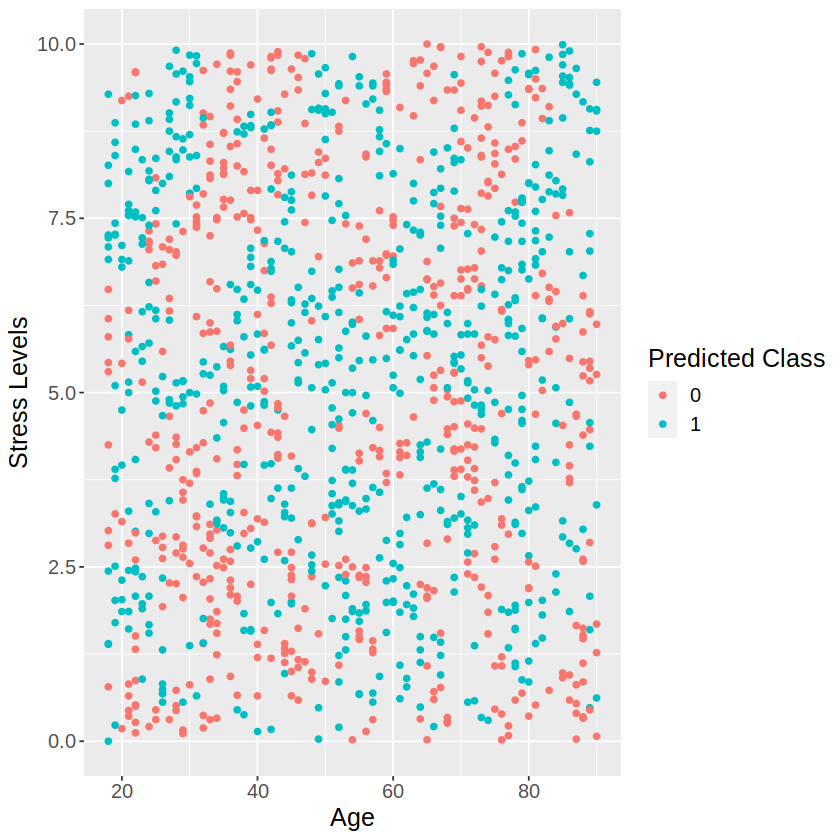

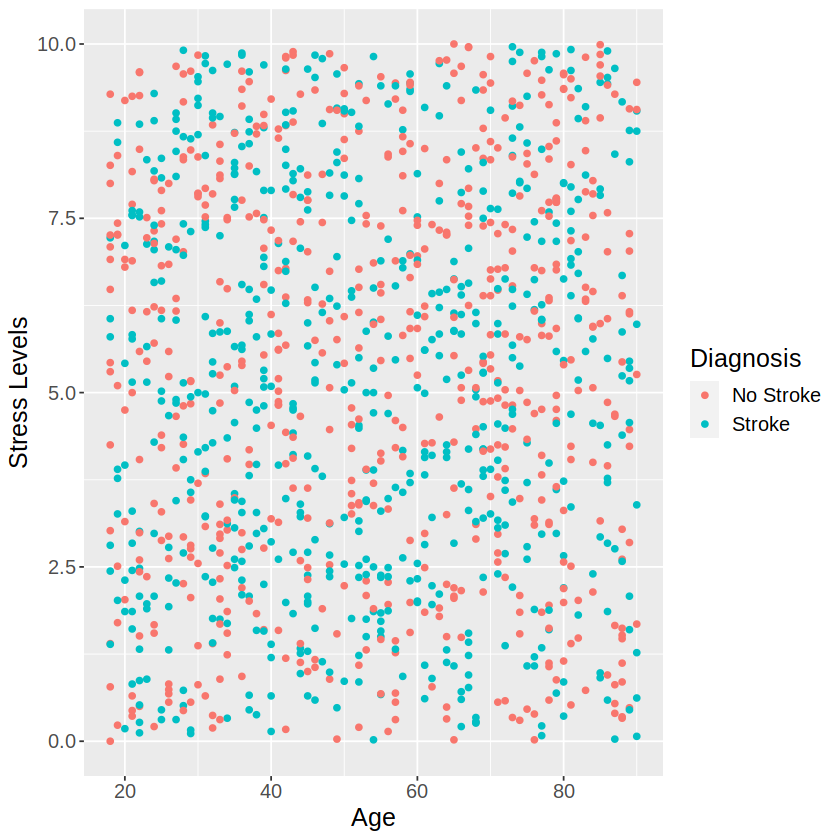

In [72]:
stroke_plots <- ggplot(stroke_predictions, aes(x = age, y = stress_levels, color = .pred_class)) +
                    geom_point() +
                labs(x = "Age",
                     y = "Stress Levels",
                     color = "Predicted Class") +
                theme(text = element_text(size = 15))
stroke_plots

stroke_plotss <- ggplot(stroke_testing, aes(x = age, y = stress_levels, color = diagnosis)) +
                    geom_point() +
                labs(x = "Age",
                     y = "Stress Levels",
                     color = "Diagnosis") +
                theme(text = element_text(size = 15))
stroke_plotss